<a href="https://colab.research.google.com/github/oprostep/2023-fall_LP/blob/main/231129_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# LOAD LIBRARIES
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras import backend
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

In [2]:
BATCH_SIZE = 32
EPOCH = 2
NUMBER_OF_CLASSES = 10
IMG_ROWS, IMG_COLS = 28, 28
INPUT_SHAPE = (IMG_ROWS, IMG_COLS,1)
CLASS_NAMES = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [3]:
# LOAD THE DATA
(x_train,y_train),(x_test,y_test)= fashion_mnist.load_data()

if backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, IMG_ROWS, IMG_COLS)
    x_test = x_test.reshape(x_test.shape[0], 1, IMG_ROWS, IMG_COLS)
    INPUT_SHAPE = (IMG_ROWS, IMG_COLS,1)
else:
    x_train = x_train.reshape(x_train.shape[0],IMG_ROWS, IMG_COLS, 1)
    x_test = x_test.reshape(x_test.shape[0], IMG_ROWS, IMG_COLS, 1)
    INPUT_SHAPE = ( IMG_ROWS, IMG_COLS,1)


# normalize the train and test data
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = keras.utils.to_categorical(y_train, NUMBER_OF_CLASSES)
y_test = keras.utils.to_categorical(y_test, NUMBER_OF_CLASSES)

print('the test shape', x_train.shape)
print('the train shape', x_test.shape)

the test shape (60000, 28, 28, 1)
the train shape (10000, 28, 28, 1)


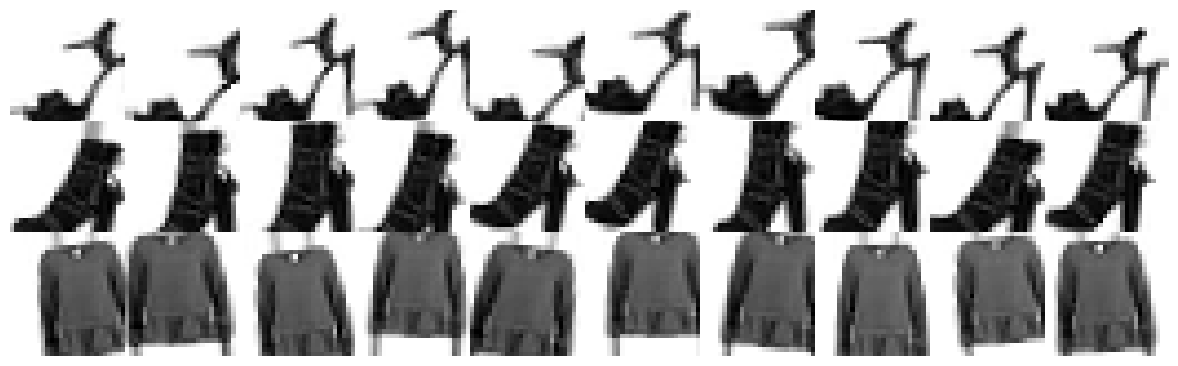

In [4]:
datagen = ImageDataGenerator(
        rotation_range=10,
        zoom_range = 0.10,
        width_shift_range=0.1,
        height_shift_range=0.1)

import matplotlib.pyplot as plt
# PREVIEW AUGMENTED IMAGES
x_train3 = x_train[9,].reshape((1,28,28,1))
y_train3 = y_train[9,].reshape((1,10))
plt.figure(figsize=(15,4.5))
for i in range(30):
    plt.subplot(3, 10, i+1)
    x_train2, y_train2 = datagen.flow(x_train3,y_train3).next()
    plt.imshow(x_train2[0].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
    if i==9: x_train3 = x_train[11,].reshape((1,28,28,1))
    if i==19: x_train3 = x_train[18,].reshape((1,28,28,1))
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

In [5]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
model = Sequential()

model.add(Conv2D(4096, kernel_size = (3,3), activation= 'relu', input_shape = INPUT_SHAPE) )
model.add(Conv2D(2048, kernel_size = (3,3), activation= 'relu', input_shape = INPUT_SHAPE) )
model.add(Conv2D(1024, kernel_size = (3,3), activation= 'relu', input_shape = INPUT_SHAPE) )
model.add(Conv2D(512, kernel_size = (3,3), activation= 'relu', input_shape = INPUT_SHAPE) )
model.add(Conv2D(256, kernel_size = (3,3), activation= 'relu'))
model.add(MaxPool2D(pool_size =(2,2)))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dense(NUMBER_OF_CLASSES,  activation= 'softmax'))

# COMPILE WITH ADAM OPTIMIZER AND CROSS ENTROPY COST
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [6]:
# TRAIN NETWORKS
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)
model.fit(datagen.flow(x_train,y_train, batch_size=BATCH_SIZE),epochs=EPOCH,callbacks = [annealer],verbose=1, validation_data=(x_test, y_test))
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss=',score[0])
print('Test_accuarcy',score[1])

Epoch 1/2
1875/1875 [==============================] - 1853s 963ms/step - loss: 0.6455 - accuracy: 0.7602 - val_loss: 0.4048 - val_accuracy: 0.8512 - lr: 0.0010
Epoch 2/2
1875/1875 [==============================] - 1800s 960ms/step - loss: 0.4312 - accuracy: 0.8400 - val_loss: 0.3495 - val_accuracy: 0.8727 - lr: 9.5000e-04
Test loss= 0.3494623303413391
Test_accuarcy 0.8726999759674072
